In [293]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [294]:
data=pd.read_excel("q1.xlsx")

In [295]:
list_pop=np.array(data["Population in 10,000's"])

In [296]:
list_profit=np.array(data["Profit In Lakhs(Rs)"])

In [297]:
# stochastic LMS

In [298]:
eps = 0
alphas = 0.001
thetas = [0.0, 0.0]

In [350]:
def matrixmulti(theta, lx0, lx1, m):
    
    hx = []
    lx00 = []
    lx11 = []
    
    for i in range(m):
        lx00.append(lx0[i]*theta[0])
        lx11.append(lx1[i]*theta[1])
        hx.append(lx00[i] + lx11[i])
        
    return hx

def cal_cost(theta, lx0, lx1, m, Y):
    
    sub1 = []
    hx = matrixmulti(theta, lx0, lx1, m)
    for i in range(m):
        sub1.append(hx[i] - Y[i])
        
    suml = 0
    for i in range(m):
        suml = suml + (hx[i] - Y[i])**2
        
    cost1 = (0.5)*suml
    
    return cost1

In [299]:
costs = 0
costls = []
lx1s = []
Ys = []
for i in range(97):
    lx1s.append(list_pop[i])
    Ys.append(list_profit[i])

In [302]:
start = time.time()
while eps<2000:
    
    for i in range(len(list_pop)):
        hxi = thetas[0] + thetas[1]*list_pop[i]
        thetas[0] = thetas[0] + alphas*(list_profit[i] - hxi)
        thetas[1] = thetas[1] + alphas*(list_profit[i] - hxi)*list_pop[i]  
        costs = cal_cost(thetas, lx0, lx1s, 97, Ys)
        costls.append(costs)
    eps = eps + 1
    
end = time.time()
print("time taken to converge = ", end - start)

time taken to converge =  27.198786735534668


In [303]:
thetas

[-3.8284881984190084, 1.0208289676852411]

In [304]:
xxxelnet = np.linspace(5,25)
yyyelnet = thetas[1]*xxxelnet + thetas[0]

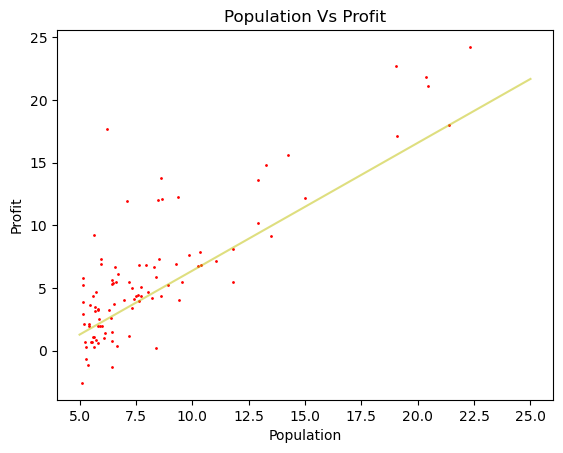

In [352]:
plt.scatter(list_pop, list_profit, s = 1, c = "red")

plt.plot(xxxelnet, yyyelnet, "-y", alpha = 0.5)

plt.xlabel("Population")
plt.ylabel("Profit")
plt.title("Population Vs Profit")
plt.show()

In [306]:
# Batch LMS

In [307]:
itr = 0
alpha = 0.0001
theta = [0.0, 0.0]
m=len(list_pop)

In [308]:
def matrixmulti(theta, lx0, lx1, m):
    
    hx = []
    lx00 = []
    lx11 = []
    
    for i in range(m):
        lx00.append(lx0[i]*theta[0])
        lx11.append(lx1[i]*theta[1])
        hx.append(lx00[i] + lx11[i])
        
    return hx

In [309]:
def cal_cost(theta, lx0, lx1, m, Y):
    
    sub1 = []
    hx = matrixmulti(theta, lx0, lx1, m)
    for i in range(m):
        sub1.append(hx[i] - Y[i])
        
    suml = 0
    for i in range(m):
        suml = suml + (hx[i] - Y[i])**2
        
    cost1 = (0.5)*suml
    
    return cost1

In [310]:
lx0 = []
lx1 = []
for i in range(m):
    lx0.append(X[i][0])
    lx1.append(X[i][1])
    
X = []
Y = []
for i in range(0, 97):
    l = []
    l.append(1.0)
    l.append(list_pop[i])
    Y.append(list_profit[i])
    X.append(l)

In [311]:
costl = []
cost = 1.0

In [313]:
start = time.time()
while itr<100000:
    su1=0.0
    su2=0.0
    for i in range(m):
        su1 = su1+ (list_profit[i]-(theta[0] + theta[1]*list_pop[i]))
        su2 = su2+ (list_profit[i]-(theta[0] + theta[1]*list_pop[i]))*list_pop[i]
        
    theta[0] = theta[0] + alpha*su1
    theta[1] = theta[1] + alpha*su2
    cost = cal_cost(theta, lx0, lx1, 97, Y)
    costl.append(cost)
    itr = itr + 1
    
end = time.time()
print("time taken to converge = ", end - start)

time taken to converge =  31.955527305603027


In [314]:
theta

[-3.915084242730683, 1.1930336441895806]

In [315]:
pointX = np.linspace(5,25)
pointY = theta[1]*xxxelnet + theta[0]

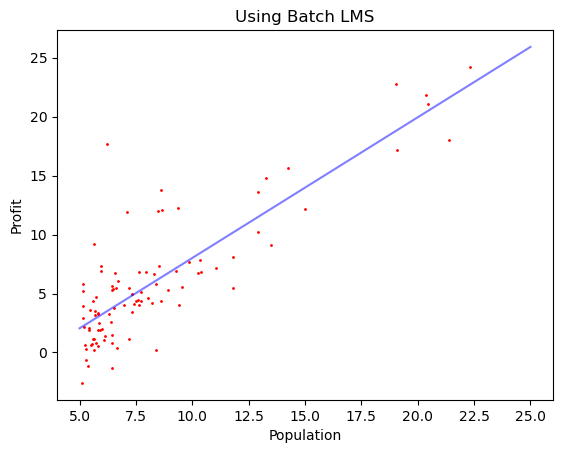

In [316]:
plt.scatter(list_pop, list_profit, s = 1, c = "red")

plt.plot(pointX, pointY, alpha = 0.5, c="blue")

plt.xlabel("Population")
plt.ylabel("Profit")
plt.title("Using Batch LMS")
plt.show()

In [317]:
# using least square close form solution

In [318]:
popl=[]
for i in range(97):
    l=[]
    l.append(1.0)
    l.append(list_pop[i])
    popl.append(l)
popl=np.array(popl)
popl.shape

(97, 2)

In [319]:
popl_T=popl.transpose()
popl_T.shape

(2, 97)

In [320]:
multi_1=np.dot(popl_T,popl)
multi_1

array([[  97.        ,  801.2006    ],
       [ 801.2006    , 8055.45257374]])

In [321]:
inv=np.linalg.inv(multi_1)

In [322]:
multi_2=np.dot(inv,popl_T)
multi_2.shape

(2, 97)

In [323]:
Y=np.array(list_profit)
Yn = np.reshape(Y, (97, 1))
Yn.shape

(97, 1)

In [324]:
final=np.dot(multi_2,Yn)
final

array([[-3.91508424],
       [ 1.19303364]])

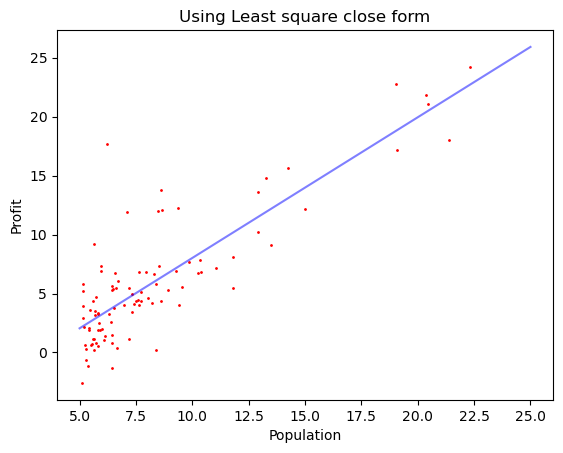

In [325]:
pointX = np.linspace(5,25)
pointY = final[1]*pointX + final[0]
plt.scatter(list_pop, list_profit, s = 1, c = "red")
plt.plot(pointX, pointY, alpha = 0.5, c="blue")
plt.xlabel("Population")
plt.ylabel("Profit")
plt.title("Using Least square close form")
plt.show()

In [326]:
# using Elastic Net

In [327]:
X = []
Y = []
for i in range(0, 97):
    l = []
    l.append(1.0)
    l.append(list_pop[i])
    Y.append(list_profit[i])
    X.append(l)

In [328]:
Xn = np.array(X)
Xn.shape

(97, 2)

In [329]:
Ynum = np.array(Y)
Ynum = np.reshape(Y, (97, 1))
Ynum.shape

(97, 1)

In [330]:
elnet = ElasticNet(alpha = 0.5) 
elnet.fit(Xn, Ynum) 

ElasticNet(alpha=0.5)

In [331]:
thetaelnet = []
thetaelnet.append(elnet.intercept_[0])
thetaelnet.append(elnet.coef_[1])
thetaelnet

[-3.6146182812011443, 1.1566567389945928]

In [332]:
    
hxelnet = []
lx00elnet = []
lx11elnet = []

for i in range(m):
    lx00elnet.append(lx0[i]*thetaelnet[0])
    lx11elnet.append(lx1[i]*thetaelnet[1])
    hxelnet.append(lx00elnet[i] + lx11elnet[i])

costelnet = cal_cost(thetaelnet, lx0, lx1, m, Y)
costelnet

435.21746000459973

In [333]:
thetaelnet

[-3.6146182812011443, 1.1566567389945928]

In [334]:
# lasso

In [335]:
lasso = Lasso(alpha = 1)

In [336]:
lasso.fit(Xn, Ynum)

Lasso(alpha=1)

In [337]:
thetalasso = []
thetalasso.append(lasso.intercept_[0])
thetalasso.append(lasso.coef_[1])
thetalasso 

[-3.3578032325506904, 1.1255645759094752]

In [338]:
#mean square error 
costlasso = cal_cost(thetalasso, lx0, lx1, m, Y)
costlasso

437.5384732811781

In [339]:
# Ridge regression

In [340]:
ridge = Ridge(alpha = 1)
ridge.fit(Xn, Ynum)
thetaridge = []
thetaridge.append(ridge.intercept_[0])
thetaridge.append(ridge.coef_[0][1])
thetaridge

[-3.908234831689253, 1.1922043975926349]

In [341]:
#mean square error 
costridge = cal_cost(thetaridge, lx0, lx1, m, Y)
costridge

434.2667177853122

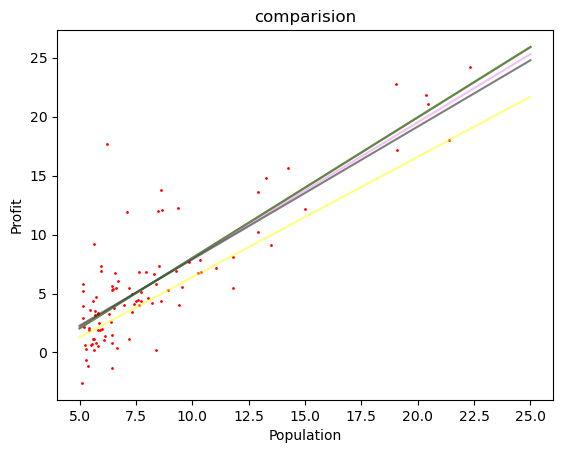

In [342]:
pointX = np.linspace(5,25)
pointY1 = thetas[1]*pointX + thetas[0]
pointY2 = theta[1]*pointX + theta[0]   
pointY3 = final[1]*pointX + final[0]
pointY4 = thetaelnet[1]*pointX + thetaelnet[0]
pointY5 = thetalasso[1]*pointX + thetalasso[0]
pointY6 = thetaridge[1]*pointX + thetaridge[0]

plt.scatter(list_pop, list_profit, s = 1, c = "red")
plt.plot(pointX, pointY1, alpha = 0.5, c="yellow")
plt.plot(pointX, pointY2, alpha = 0.5, c="blue")
plt.plot(pointX, pointY3, alpha = 0.5, c="orange")
plt.plot(pointX, pointY4, alpha = 0.5, c="violet")
plt.plot(pointX, pointY5, alpha = 0.5, c="black")
plt.plot(pointX, pointY6, alpha = 0.5, c="green")

plt.xlabel("Population")
plt.ylabel("Profit")
plt.title("comparision")
plt.show()

In [343]:
# Batch Cost

In [344]:
len(costl)

100000

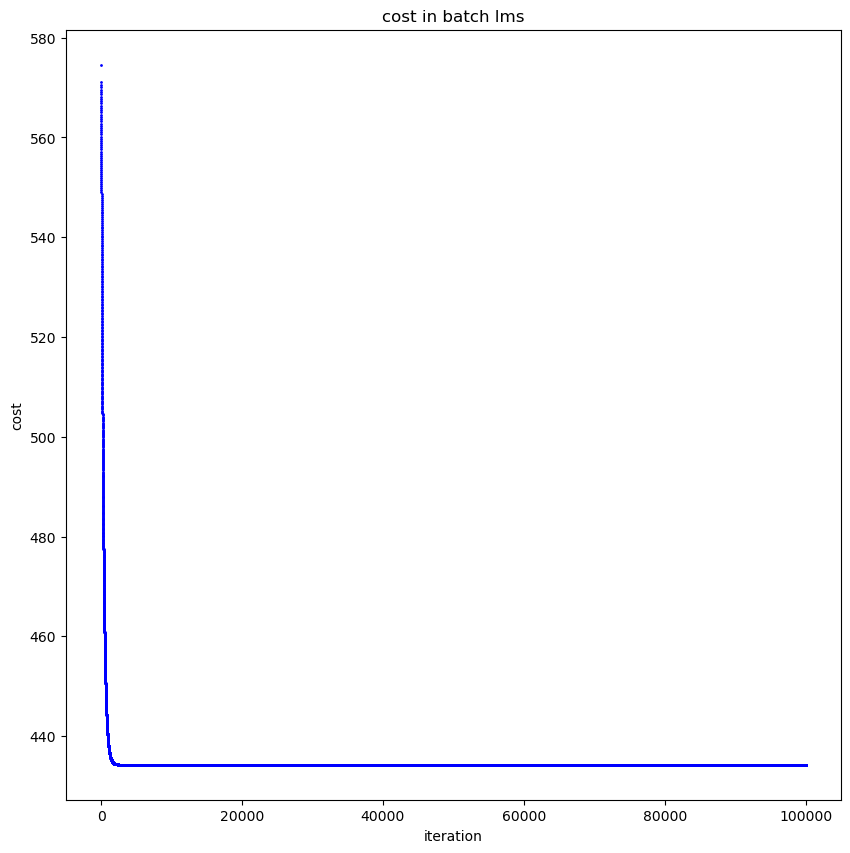

In [345]:
fig = plt.figure(figsize = (10, 10))
x_c = list(range(100000))
plt.scatter(x_c, costl, s = 1, c = "b")
plt.xlabel("iteration")
plt.ylabel("cost")
plt.title("cost in batch lms")
plt.show()

In [346]:
# stoichastic cost

In [347]:
len(costls)

194000

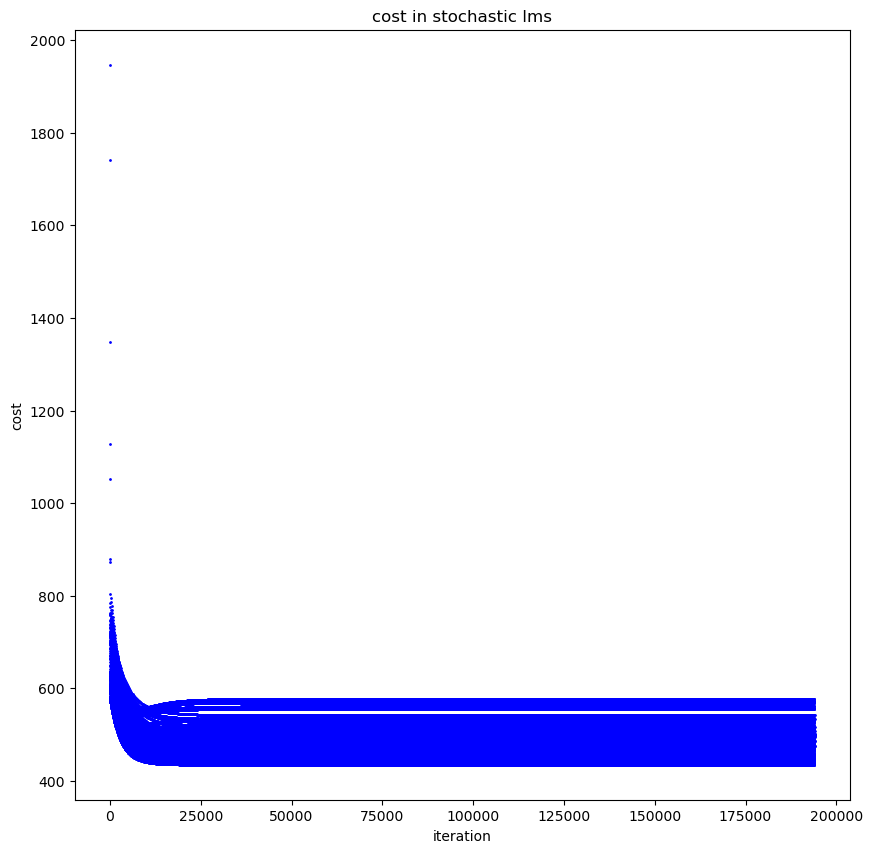

In [349]:
fig = plt.figure(figsize = (10, 10))
x_cs = list(range(194000))
plt.scatter(x_cs, costls, s = 1, c = "b")
plt.xlabel("iteration")
plt.ylabel("cost")
plt.title("cost in stochastic lms")
plt.show()